# Arknights 2.5 anniversary Gacha Simulations

### Imports

In [37]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

from copium.gacha import GachaMachine, PullResult

### Parameters

`SAMPLES` - sample size

`POT` - desired potential

`REAL_PULLS` - actual pulls done in-game

In [38]:
SAMPLES = 1_000_000
POT = 1
REAL_PULLS = 97

EXPECTED_RESULT = PullResult.BANNER
SPARK = 300

### Define function to draw histograms

In [39]:
def make_hist(pulls, cumulative=False):
    data = np.asarray(pulls)
    mode = np.bincount(data)[1:-1].argmax()

    fig, ax = plt.subplots()
    hist = ax.hist(data, np.arange(data.min() - 0.5, data.max() + 1.5), histtype='step', density=True, cumulative=cumulative)
    mode_line = ax.axvline(mode, color='k', linestyle='dashed', linewidth=1, label='mode')
    pulls_line = ax.axvline(REAL_PULLS, color='r', linestyle='dashed', linewidth=1, label='my current')
    ax.legend()

### Calculate pulls for desired operator

In [40]:
gm = GachaMachine(
    ssr_base_rate=2/100,
    ssr_pity_min_pulls=50,
    ssr_pity_rate_step=2/100,
    banner_base_rate=70/2/100,
    banner_pity_min_pulls=0,
)
pulls = gm.make_pulls_distribution(
    samples=SAMPLES,
    expected=PullResult.BANNER,
    amount=POT,
    spark=SPARK,
)

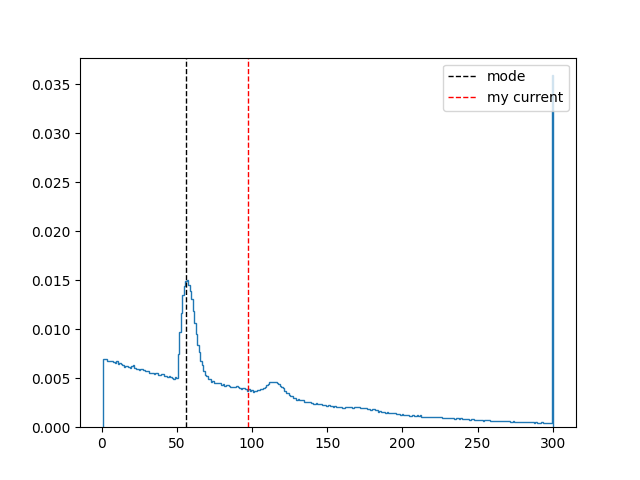

In [41]:
make_hist(pulls)

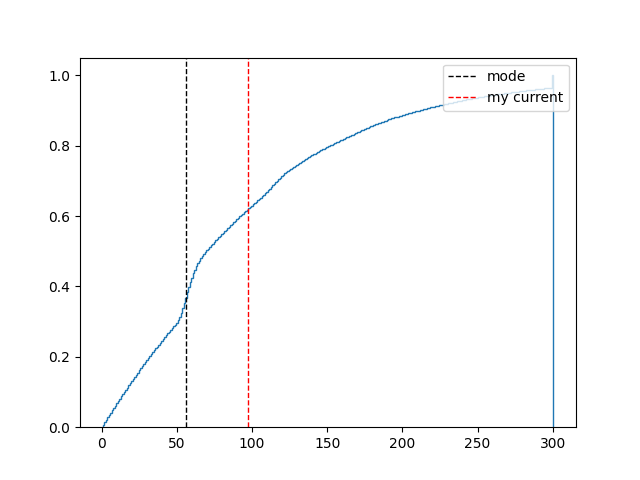

In [42]:
make_hist(pulls, cumulative=True)